In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In this notebook, I will be analyzing sleep, health, and lifestyle data from individuals using:
* Python
* Pandas
* Seaborn
* Data Analysis


**Exploratory Data Analysis (EDA):**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
print("Averages: ")
print("Age:", data['Age'].mean())
print("Sleep Duration:", int(data['Sleep Duration'].mean()))
print("Sleep Quality:", int(data['Quality of Sleep'].mean()))
print("Physical Activity:", int(data['Physical Activity Level'].mean()))
print("Stress Level:", int(data['Stress Level'].mean()))
print("Heart Rate:", int(data['Heart Rate'].mean()))
print("Daily Steps:", int(data['Daily Steps'].mean()))


Averages: 
Age: 42.18449197860963
Sleep Duration: 7
Sleep Quality: 7
Physical Activity: 59
Stress Level: 5
Heart Rate: 70
Daily Steps: 6816


**Data Analysis:


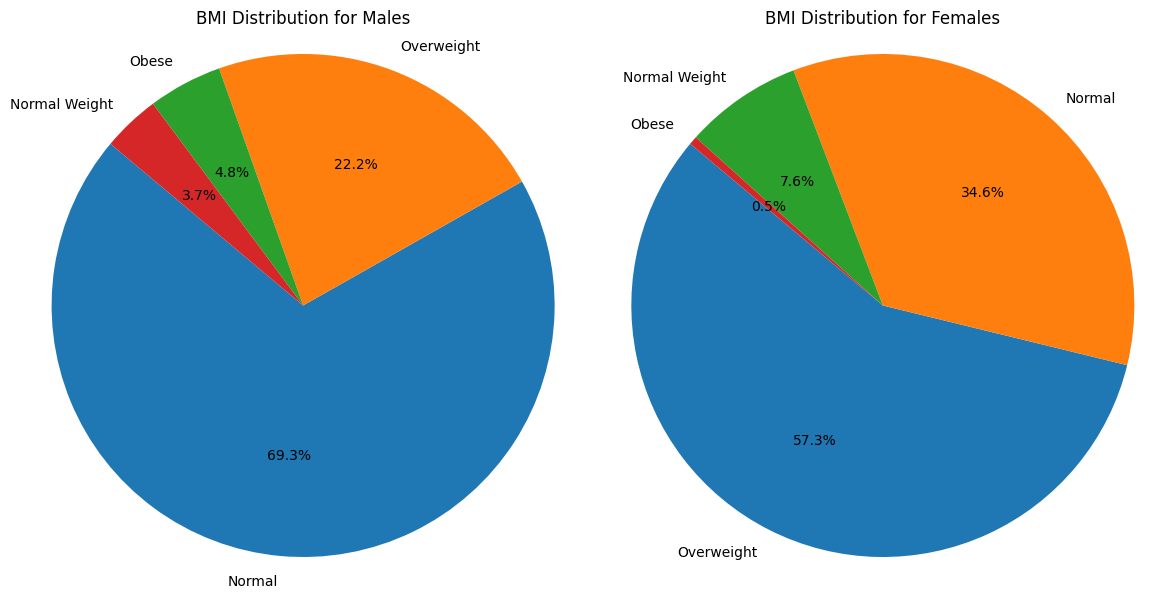

In [4]:
male_data = data[data['Gender'] == 'Male']

# Count the occurrences of each BMI category for males
male_bmi_counts = male_data['BMI Category'].value_counts()

# Plot the pie chart for males
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(male_bmi_counts, labels=male_bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("BMI Distribution for Males")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Filter data for female individuals
female_data = data[data['Gender'] == 'Female']

# Count the occurrences of each BMI category for females
female_bmi_counts = female_data['BMI Category'].value_counts()

# Plot the pie chart for females
plt.subplot(1, 2, 2)
plt.pie(female_bmi_counts, labels=female_bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("BMI Distribution for Females")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plots
plt.tight_layout()
plt.show()

In [5]:
data.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
print(data['BMI Category'].value_counts()['Overweight'])
print(data['BMI Category'].value_counts()['Normal Weight'])
print(data['BMI Category'].value_counts()['Obese'])

148
21
10


Here we can see the BMI distributions between each gender. We conclude that the majority of males are a healthy weight whereas the majority of females are overwight.  

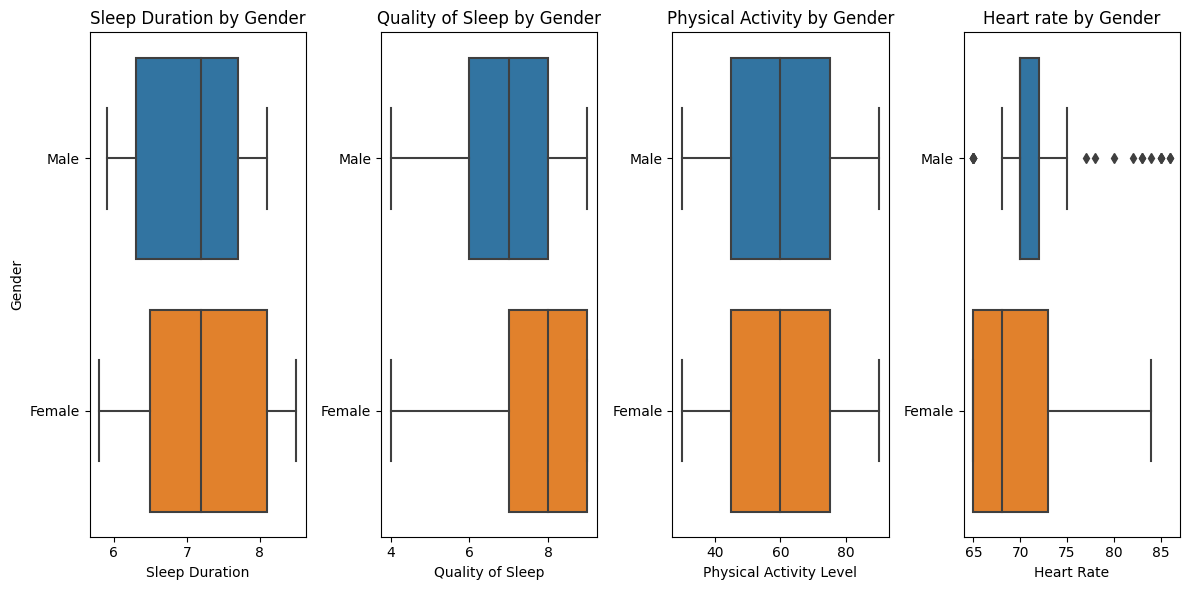

In [7]:
plt.figure(figsize=(12, 6))

# First subplot
plt.subplot(1, 4, 1)
sns.boxplot(x=data['Sleep Duration'], y=data['Gender'], data=data)
plt.title('Sleep Duration by Gender')
plt.ylabel('Gender')

# Second subplot
plt.subplot(1, 4, 2)
sns.boxplot(x=data['Quality of Sleep'], y=data['Gender'], data=data)
plt.title('Quality of Sleep by Gender')
plt.ylabel('')

plt.subplot(1,4,3)
sns.boxplot(x=data['Physical Activity Level'], y=data['Gender'], data=data)
plt.title("Physical Activity by Gender")
plt.ylabel('')

plt.subplot(1,4,4)
sns.boxplot(x=data['Heart Rate'], y=data['Gender'], data=data)
plt.title("Heart rate by Gender")
plt.ylabel('')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**CORRELATION ANALYSIS**

Text(0.5, 1.0, 'Sleep Quality & Heart Rate')

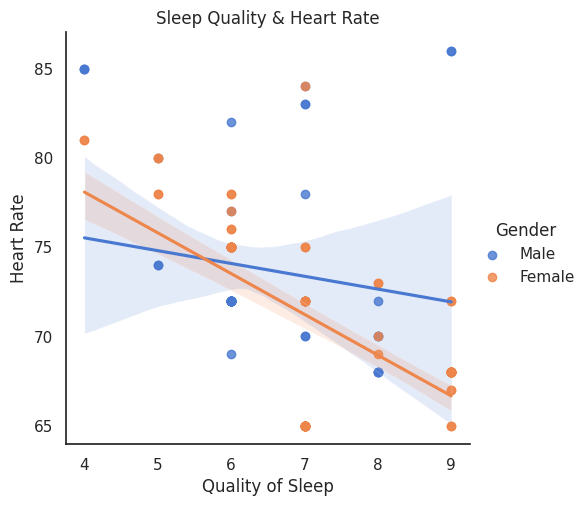

In [17]:
sns.lmplot(data=data, x='Quality of Sleep', y='Heart Rate', hue='Gender')
plt.title("Sleep Quality & Heart Rate")

Text(0.5, 1.0, 'Sleep Quality & Physical Activity')

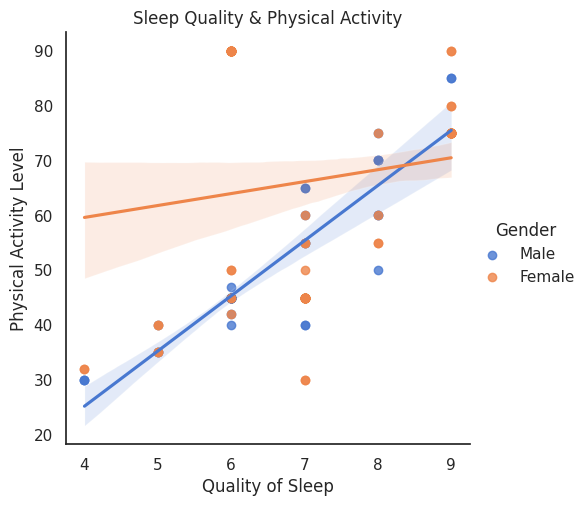

In [18]:
sns.lmplot(data=data, x='Quality of Sleep', y='Physical Activity Level', hue='Gender')
plt.title("Sleep Quality & Physical Activity")

Text(0.5, 1.0, 'Sleep Quality & Stress')

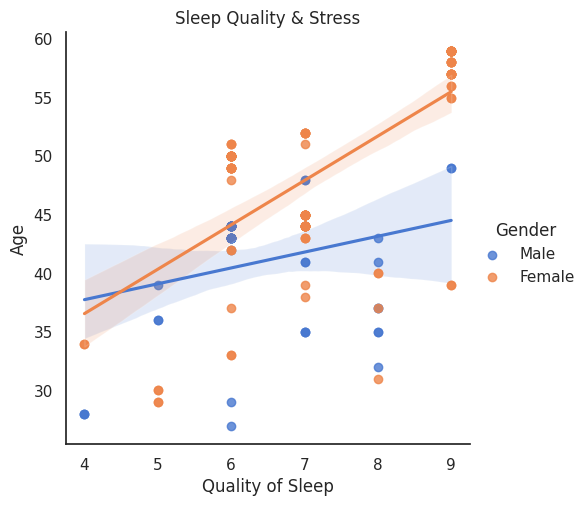

In [22]:
sns.lmplot(data=data, x='Quality of Sleep', y='Age', hue='Gender')
plt.title("Sleep Quality & Age")

<Axes: >

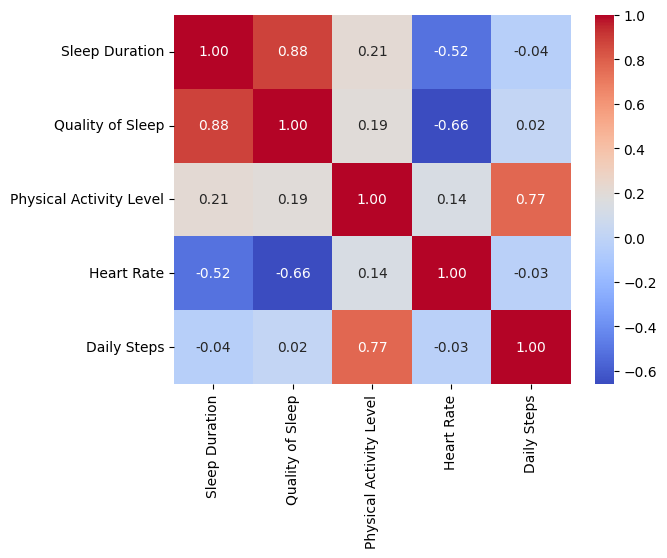

In [10]:
num_data = data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']]
matrix = num_data.corr()
sns.heatmap(data=matrix, annot=True, cmap='coolwarm', fmt=".2f")

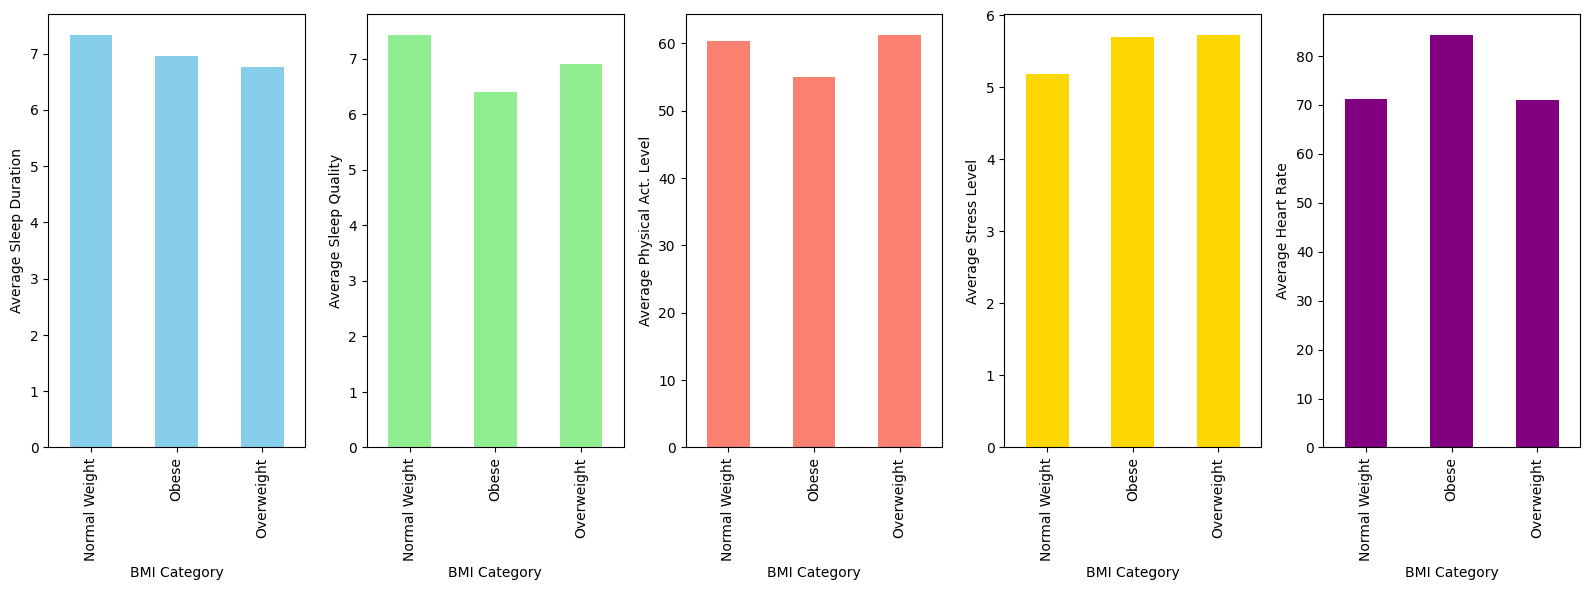

In [11]:
data.drop(data[data['BMI Category'] == 'Normal'].index, inplace=True)
          
plt.figure(figsize=(16, 6))

# Plot average sleep duration
plt.subplot(1, 5, 1)
avg_duration = data.groupby('BMI Category')['Sleep Duration'].mean()
avg_duration.plot(kind='bar', color='skyblue')
plt.ylabel('Average Sleep Duration')


# Plot average sleep quality
plt.subplot(1, 5, 2)
avg_quality = data.groupby('BMI Category')['Quality of Sleep'].mean()
avg_quality.plot(kind='bar', color='lightgreen')
plt.ylabel('Average Sleep Quality')


# Plot average physical activity level
plt.subplot(1, 5, 3)
avg_phys = data.groupby('BMI Category')['Physical Activity Level'].mean()
avg_phys.plot(kind='bar', color='salmon')
plt.ylabel("Average Physical Act. Level")


# Plot average stress level
plt.subplot(1, 5, 4)
avg_stress = data.groupby('BMI Category')['Stress Level'].mean()
avg_stress.plot(kind='bar', color='gold')
plt.ylabel("Average Stress Level")


# Plot average heart rate
plt.subplot(1, 5, 5)
avg_rate = data.groupby('BMI Category')['Heart Rate'].mean()
avg_rate.plot(kind='bar', color='purple')
plt.ylabel("Average Heart Rate")


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

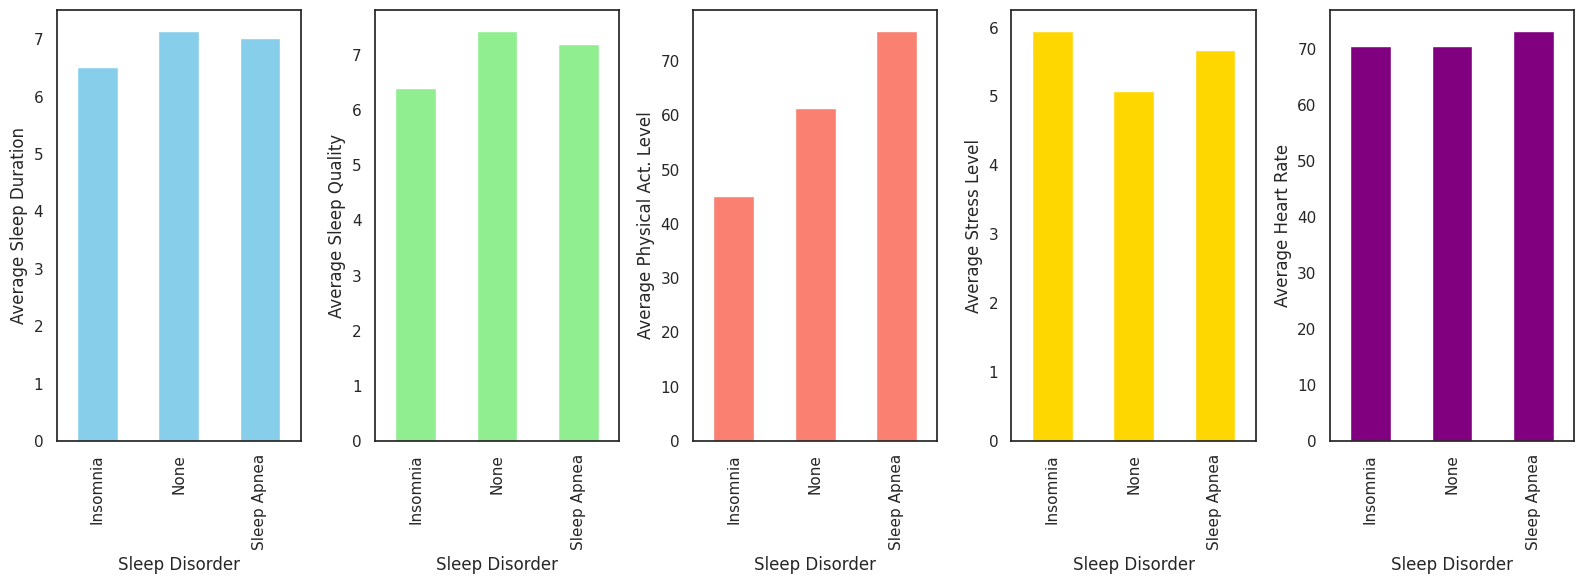

In [29]:
data.fillna("None", inplace=True)

plt.figure(figsize=(16, 6))
plt.subplot(1, 5, 1)
avg_duration = data.groupby('Sleep Disorder')['Sleep Duration'].mean()
avg_duration.plot(kind='bar', color='skyblue')
plt.ylabel('Average Sleep Duration')

plt.subplot(1, 5, 2)
avg_quality = data.groupby('Sleep Disorder')['Quality of Sleep'].mean()
avg_quality.plot(kind='bar', color='lightgreen')
plt.ylabel('Average Sleep Quality')


# Plot average physical activity level
plt.subplot(1, 5, 3)
avg_phys = data.groupby('Sleep Disorder')['Physical Activity Level'].mean()
avg_phys.plot(kind='bar', color='salmon')
plt.ylabel("Average Physical Act. Level")


# Plot average stress level
plt.subplot(1, 5, 4)
avg_stress = data.groupby('Sleep Disorder')['Stress Level'].mean()
avg_stress.plot(kind='bar', color='gold')
plt.ylabel("Average Stress Level")


# Plot average heart rate
plt.subplot(1, 5, 5)
avg_rate = data.groupby('Sleep Disorder')['Heart Rate'].mean()
avg_rate.plot(kind='bar', color='purple')
plt.ylabel("Average Heart Rate")

plt.tight_layout()
plt.show()

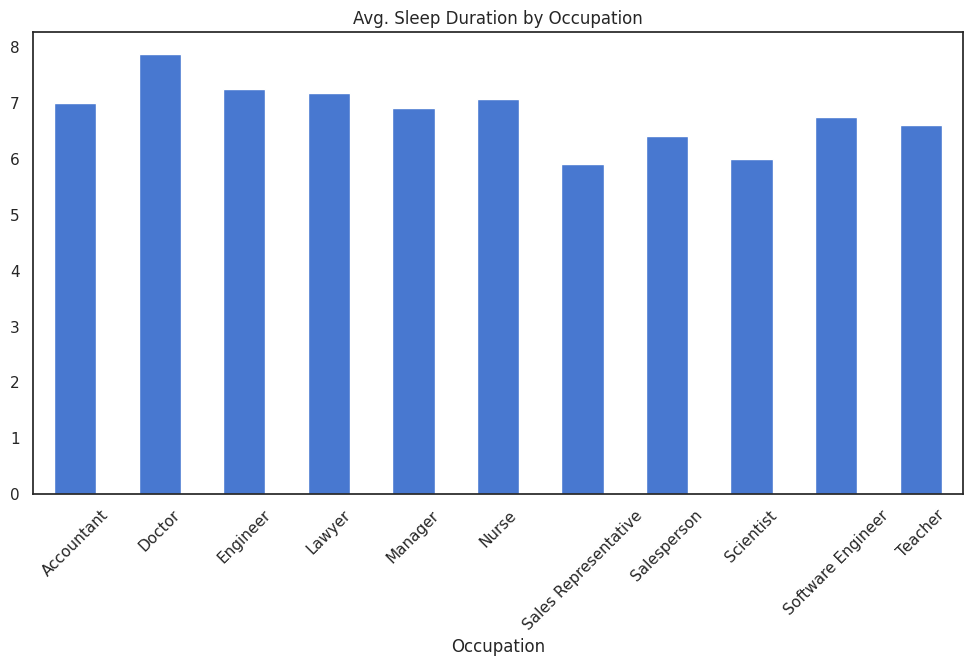

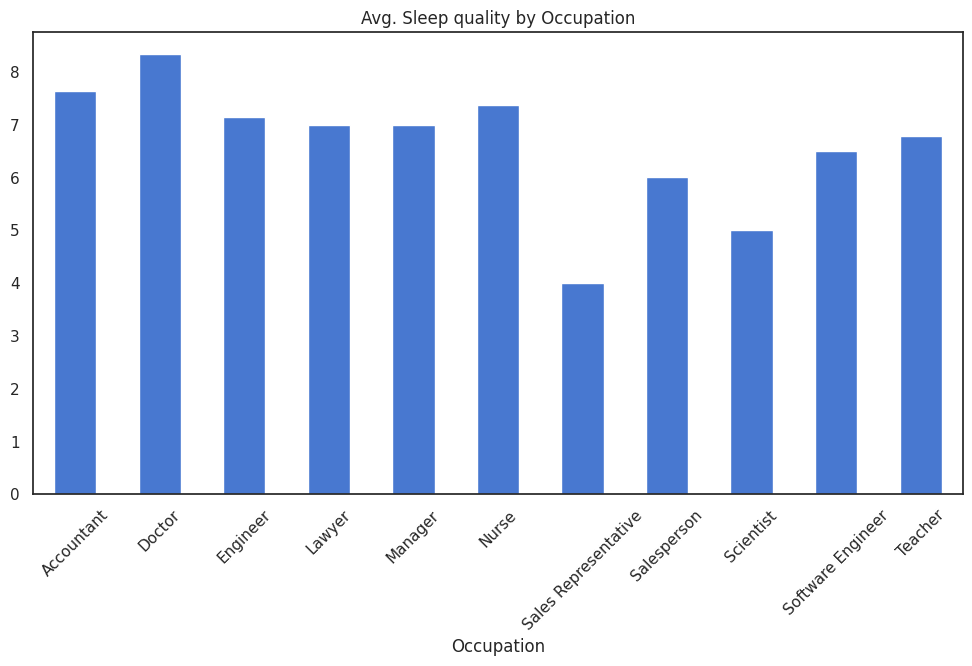

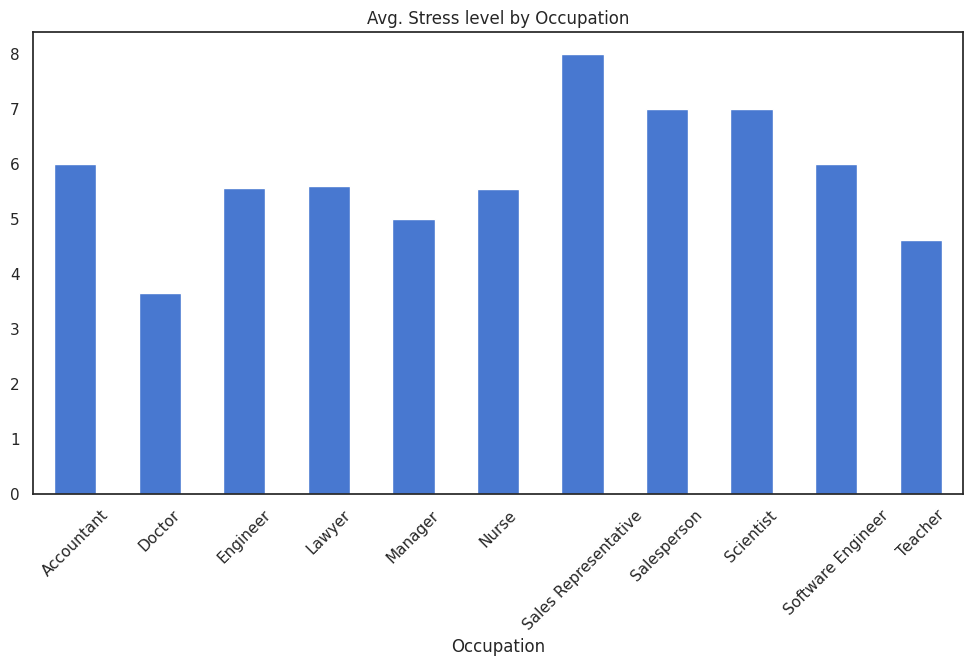

In [14]:
# Bar Plot
plt.figure(figsize=(12, 6))
avg_dur = data.groupby('Occupation')['Sleep Duration'].mean()
avg_dur.plot(kind='bar')
plt.title('Avg. Sleep Duration by Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

plt.figure(figsize=(12, 6))
avg_dur = data.groupby('Occupation')['Quality of Sleep'].mean()
avg_dur.plot(kind='bar')
plt.title('Avg. Sleep quality by Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

plt.figure(figsize=(12, 6))
avg_dur = data.groupby('Occupation')['Stress Level'].mean()
avg_dur.plot(kind='bar')
plt.title('Avg. Stress level by Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



